# Image Convolutions

In [10]:
import numpy as np
from skimage.color import rgb2gray
from skimage.transform import resize
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
plt.rcParams['font.size'] = 16

In [11]:
def image_preprocess(filename):
    img = plt.imread(filename)
    img = resize(img, (200,200), mode='reflect') 
    return rgb2gray(img)

def convolution(img, filt):

    plt.figure(figsize=(16,16))
    plt.subplot(1,2,1)
    
    plt.imshow(img)
    plt.xticks(())
    plt.yticks(())
    plt.title("Original")
    I_filt = convolve2d(img,filt, boundary='symm', mode='same')

    I_filt = np.maximum(0, I_filt)
    I_filt = np.minimum(1, I_filt) 
    plt.subplot(1,2,2)
    if np.sum(filt) == 0: 
        plt.imshow(I_filt/np.max(I_filt))
    else:
        plt.imshow(I_filt)
    plt.xticks(())
    plt.yticks(())
    plt.title("After Filtering")

    return I_filt

In [12]:
img = image_preprocess("imgs/BirinderSingh_Pic.jfif")

## Horizontal convolution filter 

(1, 10)
[[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]]


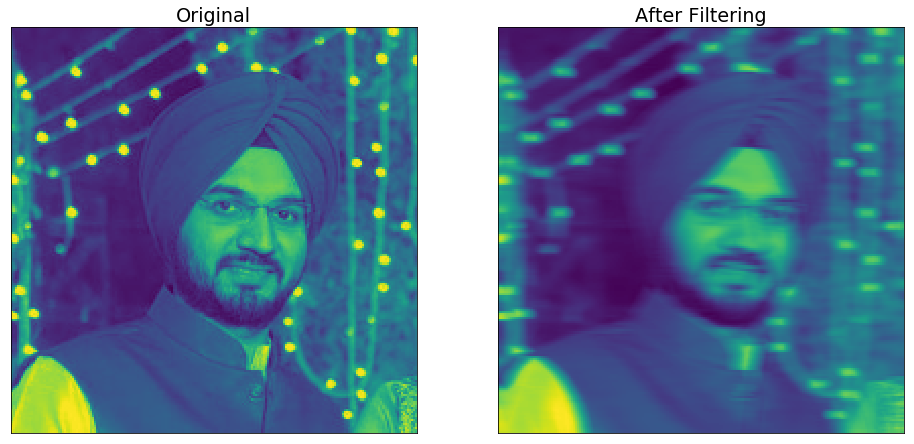

In [13]:
ft = 0.1*np.ones(10)[None]
print(ft.shape)
print(ft)
res = convolution(img, ft)

The filter is a horizontal containing $0.1$. There is blurring in the horizontal direction, meaning the _vertical_ edges get blurred.

## Vertical convolution filter 

(10, 1)
[[0.1]
 [0.1]
 [0.1]
 [0.1]
 [0.1]
 [0.1]
 [0.1]
 [0.1]
 [0.1]
 [0.1]]


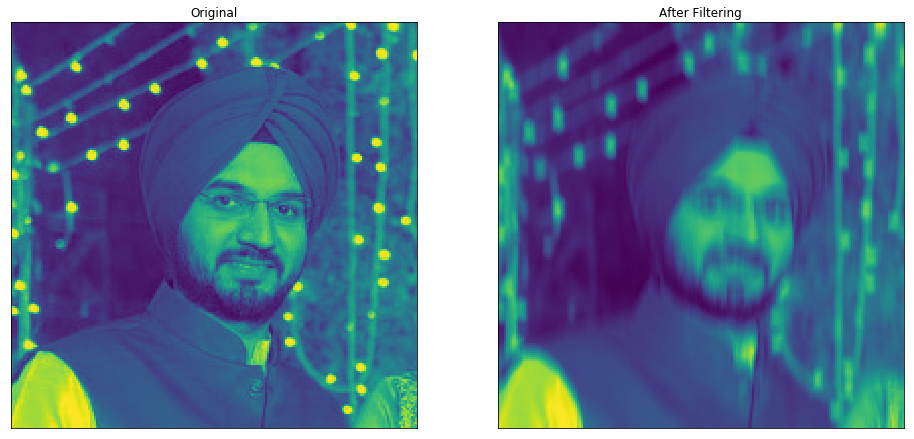

In [5]:
ft = 0.1*np.ones(10)[:,None]
print(ft.shape)
print(ft)

res = convolution(img, ft)

The convolution is the vertical filter with 0.1 in all elements which will average the image in the vertical direction and make it blurr. This will blurr the horizontal edges.

## Identity filter 

(5, 5)
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


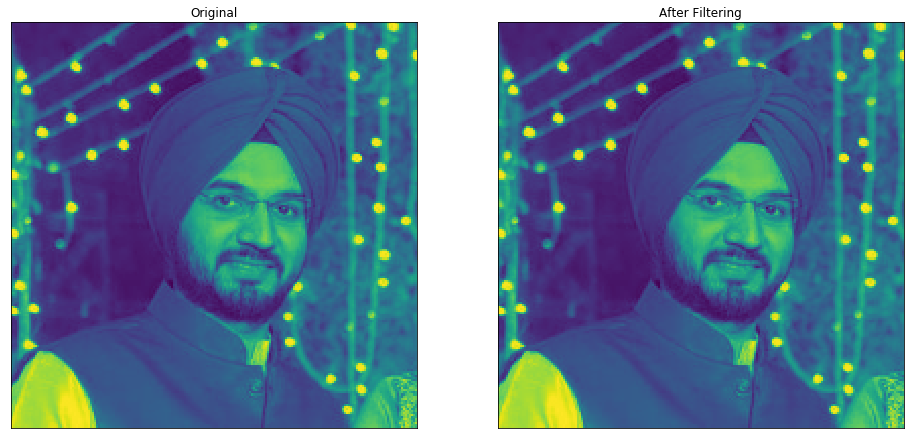

In [6]:
ft = np.zeros((5,5))
ft[2,2] = 1
print(ft.shape)
print(ft)
res = convolution(img, ft)

Since the filter or the convolution is Identity the output remains the same. Every pixel retains its value.

## Averaging convolution filter 

(10, 10)


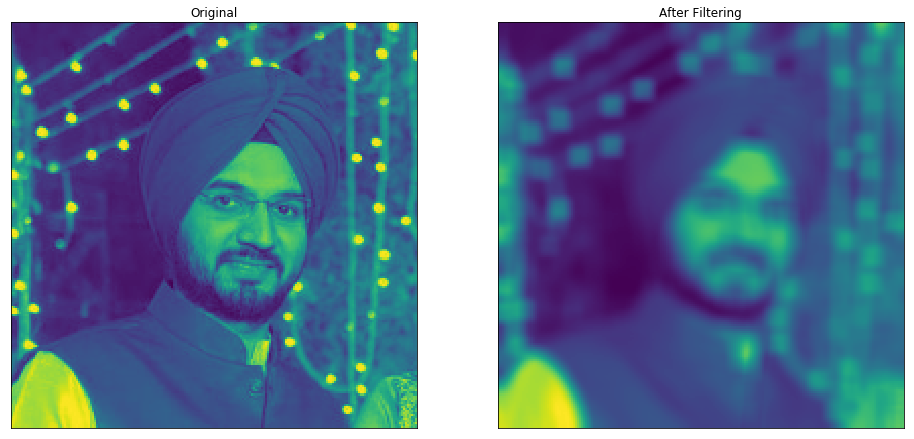

In [7]:
ft = 0.01*np.ones((10,10))
print(ft.shape)
res = convolution(img, ft)

In [8]:
ft

array([[0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01],
       [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01],
       [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01],
       [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01],
       [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01],
       [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01],
       [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01],
       [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01],
       [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01],
       [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01]])

This filter is 10 by 10 averaging filter. It will take the values from the grid 10 by 10 around the point of interest and average them as 0.01. The output image is going to be blurr in all directions.

## Edge detection filter

(3, 3)
[[-0.125 -0.125 -0.125]
 [-0.125  1.    -0.125]
 [-0.125 -0.125 -0.125]]


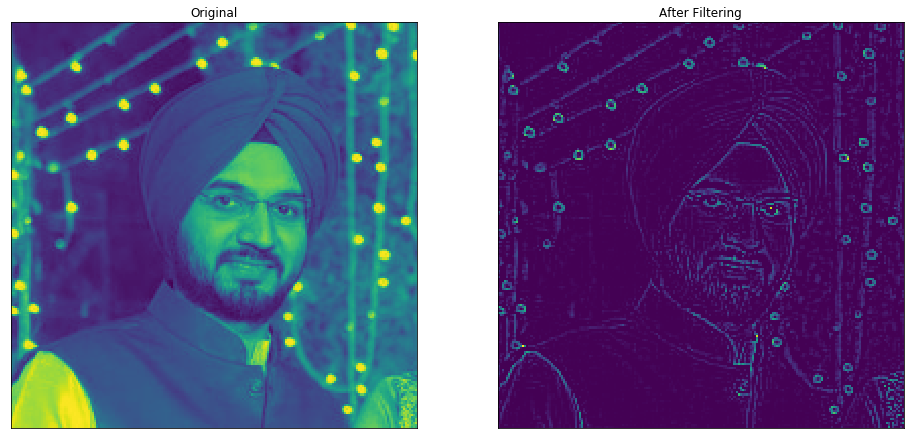

In [9]:
ft = -np.ones((3,3))/8
ft[1,1] = 1
print(ft.shape)
print(ft)
res6 = convolution(img, ft)

For every pixel in the image it multiplies it by 1 and subtracts the 0.125 of all the surrounding pixel values from it. This way the maximum effect is observed at the edges where there is stark difference between the pixel value and its surroundings. However in any other region the effect will be cancelled as the filter overall sums to 0.